# Table of Content
### 1.  [Package and Data Loading](#PDL)
### 2.  [Data Summary in one line](#PPF)
### 3.  [Data Cleaning](#DCL)
### 4.  [Data Visualization](#DVL)
### 5.  [Decision Tree](#DT)
### 6.  [Recommender System](#RS)
### 7.  [Simulator](#SM)
### 8.  [Simple Linear Regression](#SLR)
### 9.  [Word Cloud](#WC)
### 10.  [Logistic Regression](#LR)
### 11.  [Classification Algorithms](#CLA)
### 12.  [Ensemble Classifier](#ECL)
### 13.  [K-means Clustering](#KMA)
### 14. [Regression Algorithms](#RGA)
### 15. [Sentimental Analysis](#SA)



In [2]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Package and Data Loading
<a id="PDL"></a>

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib import*

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg

import nltk
#nltk.download()
import re
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
import ipywidgets as widgets
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from scipy.cluster.vq import kmeans, vq , whiten
from sklearn import metrics


from pandas import DataFrame

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.vq import vq, kmeans, whiten

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler


import scipy as sp
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import ipywidgets as widgets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


from copy import deepcopy
from matplotlib import pyplot as plt

import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections


import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import random
import seaborn as sns
# import shapefile as shp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import ipywidgets as widgets

In [4]:
#os.chdir("C:/Users/17653/Downloads")

In [5]:
d = pd.read_csv("zomato.csv")


## 2.Data Summary in one line
<a id="PPF"></a>

In [6]:
pandas_profiling.ProfileReport(d)

In [7]:
d.shape

(51717, 17)

## 3. Data Cleaning
<a id="DCL"></a>

In [8]:
d.drop(["url",'phone','listed_in(type)','listed_in(city)'],axis =1,inplace=True)

In [9]:
d['UID'] = d['name']+d['address']

In [10]:
d = d.drop_duplicates(subset='UID')

In [11]:
d.drop('address',axis =1, inplace=True)

In [12]:
d.drop('name',axis =1, inplace=True)

In [13]:
d1 = d[['location','UID']].groupby('location').nunique()

In [14]:
d1['location'] = d1.index

In [15]:
d1.reset_index(drop=True,inplace=True)

In [16]:
d1.rename(columns = {'UID':'Number of restaurants/loc'},inplace=True)

In [17]:
d = d.merge(d1,on='location')

In [18]:
d2 = d[['cuisines','UID']].groupby('cuisines').nunique()

In [19]:
d2['cuisines'] = d2.index

In [20]:
d2.rename(columns = {'UID': 'Number of restaurants/cuisine'}, inplace=True)

In [21]:
d2.reset_index(drop=True,inplace=True)

In [22]:
d = d.merge(d2,on='cuisines')

In [23]:
d3 = d[["rest_type","UID"]].groupby("rest_type").nunique()

In [24]:
d3["rest_type"] = d3.index

In [25]:
d3.reset_index(drop=True,inplace=True)

In [26]:
d = d.merge(d3, on='rest_type')

In [27]:
d.rename(columns = {'UID_x': 'UID','UID_y':'Number_of_restaurants/rest_type'}, inplace=True)

In [28]:
d = d.drop_duplicates()

In [29]:
d['online-order'] = np.where(d['online_order'] =='Yes',1,0)

In [30]:
d['book-table'] = np.where(d['book_table'] =='Yes',1,0)

In [31]:
d = d.drop('book_table', axis = 1)

In [32]:
d = d.drop('online_order',axis = 1)

In [33]:
loc = pd.read_csv('Location vs UID.csv')

In [34]:
d = pd.merge(d, loc[['location','Final']], on='location')

In [35]:
cuisine = pd.read_csv('Cuisines vs UID.csv')

In [36]:
d = pd.merge(d, cuisine, on='cuisines')

In [37]:
rest_type = pd.read_csv('Rest Type vs UID.csv')

In [38]:
d = pd.merge(d, rest_type[['rest_type','rest_type updated']], on='rest_type')

In [39]:
d.drop(['location','cuisines','rest_type'],axis =1,inplace=True)

In [40]:
d.rename(columns = {'Final': 'location','rest_type_updated':'rest_type','Cuisines Updated':'cuisines'}, inplace=True)

In [41]:
final = d 

In [42]:
d = final

In [43]:
d = d.dropna(subset =['rate'])

In [44]:
new = d['rate'].str.split("/",n=1,expand = True)

In [45]:
d['rate'] = new[0]

In [46]:
sub_s1 = d[d['rate']=='NEW']

In [47]:
d['rate'].nunique()

54

In [48]:
d = d[d.rate!='NEW']

In [49]:
d['rate'].nunique()

53

In [50]:
new = d['cuisines'].str.split(",",n=1,expand = True)

In [51]:
d['cuisines'] = new[0]

In [52]:
d.columns

Index(['rate', 'votes', 'dish_liked', 'approx_cost(for_two_people)',
       'reviews_list', 'menu_item', 'UID', 'Number of restaurants/loc',
       'Number of restaurants/cuisine', 'Number_of_restaurants/rest_type',
       'online-order', 'book-table', 'location', 'cuisines',
       'rest_type updated'],
      dtype='object')

In [53]:
d.rename(columns = {'approx_cost(for_two_people)':'approx_cost(for two people)'}, inplace=True)
d['approx_cost(for two people)'] = d['approx_cost(for two people)'].str.replace(',', '')

In [54]:
x = pd.to_numeric(d['approx_cost(for two people)'])

In [55]:
d['approx_cost(for two people)'] = x

In [56]:
d.head()

rate  votes                                         dish_liked  \
0  2.6    283  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...   
1  2.5    247  Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...   
2  4.0    533  Lassi, Butter Chicken, Sarson Ka Saag, Rajma C...   
3  3.0     38                                                NaN   
4  4.1    131              Naan, Roti, Shahi Paneer, Shahi Tukda   

   approx_cost(for two people)  \
0                        600.0   
1                        500.0   
2                        600.0   
3                        450.0   
4                        650.0   

                                        reviews_list menu_item  \
0  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   
1  [('Rated 5.0', "RATED\n  I have never written ...        []   
2  [('Rated 2.0', 'RATED\n  Had a lot of expectat...        []   
3  [('Rated 3.0', 'RATED\n  Ordered my Sunday Lun...        []   
4  [('Rated 4.0', "RATED\n  Went to this place on...        []   

                                                 UID  \
0  Nandhini Deluxe304, Opposite Apollo Public Sch...   
1  Dal Tadkaa1, Kathriguppe Main Road, 3rd Stage,...   
2  Bathinda Junction2331, 17th Cross, 24th Main, ...   
3  Punjab Di Shaan543, 7th Cross, 24th Main, Oppo...   
4  Dhaba Bytes78 Ground Floor, Right Wing, 14th C...   

   Number of restaurants/loc  Number of restaurants/cuisine  \
0                        295                            745   
1                        295                            745   
2                        705                            745   
3                        705                            745   
4                        705                            745   

   Number_of_restaurants/rest_type  online-order  book-table      location  \
0                             2236             0           0  Banashankari   
1                             2236             1           0  Banashankari   
2                             2236             1           1           HSR   
3                             2236             1           0           HSR   
4                             2236             1           0           HSR   

       cuisines rest_type updated  
0  North Indian            Dining  
1  North Indian            Dining  
2  North Indian            Dining  
3  North Indian            Dining  
4  North Indian            Dining

In [57]:
new = d['dish_liked'].str.split(",",expand = True)

In [58]:
new = new.replace(['None'], 'NaN')

In [59]:
new['Count'] = new.count(axis = 1)

In [60]:
d['Count_of_dishes_liked'] = new['Count']

In [61]:
new = final['menu_item'].str.split(",",expand = True)

In [62]:
new1 = new.count(axis = 1)

In [63]:
d['Count_of_menu_items'] = new1

In [64]:
d.shape

(2194, 17)

In [65]:
d['Count_of_menu_items'].max()

325

In [66]:
#d.drop('Unnamed: 0',axis= 1,inplace=True)

In [67]:
d1 = d[['location','UID']].groupby('location').nunique()

d1['location'] = d1.index

d1.reset_index(drop=True,inplace=True)

d1.rename(columns = {'UID':'Number of restaurants/loc'},inplace=True)

d = d.merge(d1,on='location')

In [68]:
d2 = d[['cuisines','UID']].groupby('cuisines').nunique()

d2['cuisines'] = d2.index

d2.rename(columns = {'UID': 'Number of restaurants/cuisine'}, inplace=True)

d2.reset_index(drop=True,inplace=True)

d = d.merge(d2,on='cuisines')

In [69]:
d.rename(columns = {'rest_type updated':'rest_type'}, inplace=True)

In [70]:
d3 = d[["rest_type","UID"]].groupby("rest_type").nunique()

d3["rest_type"] = d3.index


d3.reset_index(drop=True,inplace=True)


d = d.merge(d3, on='rest_type')

d.rename(columns = {'UID_x': 'UID','UID_y':'Number_of_restaurants/rest_type'}, inplace=True)

In [71]:
d.rename(columns = {'Number_of_restaurants/rest_type':'Number_of_restaurants/rest_type_x'},inplace=True)

In [72]:
d.columns.values

array(['rate', 'votes', 'dish_liked', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'UID', 'Number of restaurants/loc_x',
       'Number of restaurants/cuisine_x',
       'Number_of_restaurants/rest_type_x', 'online-order', 'book-table',
       'location', 'cuisines', 'rest_type', 'Count_of_dishes_liked',
       'Count_of_menu_items', 'Number of restaurants/loc_y',
       'Number of restaurants/cuisine_y',
       'Number_of_restaurants/rest_type_x'], dtype=object)

In [73]:
#d.rename([19]:'Number_of_restaurants/rest_type_y',inplace=True)

In [74]:
column_names = d.columns.values

In [75]:
column_names

array(['rate', 'votes', 'dish_liked', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'UID', 'Number of restaurants/loc_x',
       'Number of restaurants/cuisine_x',
       'Number_of_restaurants/rest_type_x', 'online-order', 'book-table',
       'location', 'cuisines', 'rest_type', 'Count_of_dishes_liked',
       'Count_of_menu_items', 'Number of restaurants/loc_y',
       'Number of restaurants/cuisine_y',
       'Number_of_restaurants/rest_type_x'], dtype=object)

In [76]:
column_names[19] = 'Number_of_restaurants/rest_type_y'

In [77]:
column_names

array(['rate', 'votes', 'dish_liked', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'UID', 'Number of restaurants/loc_x',
       'Number of restaurants/cuisine_x',
       'Number_of_restaurants/rest_type_x', 'online-order', 'book-table',
       'location', 'cuisines', 'rest_type', 'Count_of_dishes_liked',
       'Count_of_menu_items', 'Number of restaurants/loc_y',
       'Number of restaurants/cuisine_y',
       'Number_of_restaurants/rest_type_y'], dtype=object)

In [78]:
d.columns = column_names

In [79]:
d.rename(columns = {'Number of restaurants/loc_x':'Number_of_restaurants/loc_x',
                    'Number of restaurants/cuisine_x':'Number_of_restaurants/cuisine_x',
                    'Number of restaurants/loc_y':'Number_of_restaurants/loc_y',
                    'Number of restaurants/cuisine_y':'Number_of_restaurants/cuisine_y'
                    }, inplace=True)

In [80]:
Zomato_vis1 = d.drop(['Number_of_restaurants/cuisine_y','Number_of_restaurants/loc_y','Number_of_restaurants/rest_type_y'], axis=1)

In [81]:
Zomato_vis1.rename(columns = {'Number_of_restaurants/loc_x':'Number_of_restaurants/loc',
                    'Number_of_restaurants/cuisine_x':'Number_of_restaurants/cuisine',
                    'Number_of_restaurants/rest_type_x':'Number_of_restaurants/rest_type'}, inplace=True)

In [82]:
Zomato_vis2 = d.drop(['Number_of_restaurants/cuisine_x','Number_of_restaurants/loc_x','Number_of_restaurants/rest_type_x'],axis= 1)

In [83]:
 d.drop(['Number_of_restaurants/cuisine_x','Number_of_restaurants/loc_x','Number_of_restaurants/rest_type_x'],axis= 1,inplace=True)

In [84]:
d.rename(columns = {'Number_of_restaurants/cuisine_y':'Number_of_restaurants/cuisine',
                    'Number_of_restaurants/loc_y':'Number_of_restaurants/loc',
                    'Number_of_restaurants/rest_type_y':'Number_of_restaurants/rest_type'},inplace=True)

In [85]:
d.head()

rate  votes                                         dish_liked  \
0  2.6    283  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...   
1  2.5    247  Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...   
2  4.0    533  Lassi, Butter Chicken, Sarson Ka Saag, Rajma C...   
3  3.0     38                                                NaN   
4  4.1    131              Naan, Roti, Shahi Paneer, Shahi Tukda   

   approx_cost(for two people)  \
0                        600.0   
1                        500.0   
2                        600.0   
3                        450.0   
4                        650.0   

                                        reviews_list menu_item  \
0  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   
1  [('Rated 5.0', "RATED\n  I have never written ...        []   
2  [('Rated 2.0', 'RATED\n  Had a lot of expectat...        []   
3  [('Rated 3.0', 'RATED\n  Ordered my Sunday Lun...        []   
4  [('Rated 4.0', "RATED\n  Went to this place on...        []   

                                                 UID  online-order  \
0  Nandhini Deluxe304, Opposite Apollo Public Sch...             0   
1  Dal Tadkaa1, Kathriguppe Main Road, 3rd Stage,...             1   
2  Bathinda Junction2331, 17th Cross, 24th Main, ...             1   
3  Punjab Di Shaan543, 7th Cross, 24th Main, Oppo...             1   
4  Dhaba Bytes78 Ground Floor, Right Wing, 14th C...             1   

   book-table      location      cuisines rest_type  Count_of_dishes_liked  \
0           0  Banashankari  North Indian    Dining                      5   
1           0  Banashankari  North Indian    Dining                      7   
2           1           HSR  North Indian    Dining                      7   
3           0           HSR  North Indian    Dining                      0   
4           0           HSR  North Indian    Dining                      4   

   Count_of_menu_items  Number_of_restaurants/loc  \
0                    1                         64   
1                    1                         64   
2                    1                        116   
3                    1                        116   
4                    1                        116   

   Number_of_restaurants/cuisine  Number_of_restaurants/rest_type  
0                            526                              356  
1                            526                              356  
2                            526                              356  
3                            526                              356  
4                            526                              356

In [86]:
#d = d.drop(['dish_liked'], axis=1)

In [87]:
d.rename(columns = {'rate': 'rating','UID_y':'Number_of_restaurants/rest_type'}, inplace=True)

In [88]:
df = d

In [89]:
df = df.query('rating != "-"') 
df

rating  votes                                         dish_liked  \
0       2.6    283  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...   
1       2.5    247  Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...   
2       4.0    533  Lassi, Butter Chicken, Sarson Ka Saag, Rajma C...   
3       3.0     38                                                NaN   
4       4.1    131              Naan, Roti, Shahi Paneer, Shahi Tukda   
5       4.0   1551  Mojito, Orange Lemonade, Masala Shikanji, Lass...   
6       4.0    917  Paratha, Lassi, Chaach, Matar Pulao, Buttermil...   
7       4.0   1829  Mango Lassi, Tomato Soup, Egg Curry, Chana Mas...   
8       4.0    988  Masala Lassi, Paneer Tikka Masala, Jeera Rice,...   
9       3.5     11                                                NaN   
10      3.3      5                                                NaN   
11      3.9    880  Paneer Makhani, Vegetable Biryani, Rabri, Dal ...   
12      3.7    829  Thali, Puran Poli, Misal Pav, Sabudana Vada, B...   
13      3.7    309  Chicken Curry, Mutton Curry, Mutton Kosha, Dho...   
14      3.7    132  Chicken Curry, Lunch Buffet, Chicken Biryani, ...   
15      4.1    295  Jal-jeera, Stuffed Kulcha, Punjabi Chicken Mas...   
16      2.7    442  Paratha, Vegetarian, Makke Ki Roti, Curd Rice,...   
17      4.0     34  Chaat, Pav Bhaji, Kheer, Aloo Paratha, Rabri, ...   
18      3.7    125  Panneer Butter Masala, Butter Chicken, Tangdi ...   
19     3.5      28                                                NaN   
20     3.6      12                                                NaN   
21     3.4       7                                                NaN   
22     3.2       4                                                NaN   
23      4.4   1209  Mutton Curry, Lassi, Dal Makhani, Chicken Butt...   
24      4.4   1209  Mutton Curry, Lassi, Dal Makhani, Chicken Butt...   
25      3.7    194  Kulcha, Panneer Butter Masala, Paneer Methi Ma...   
26      3.6     32                                                NaN   
27     3.0      23                                                NaN   
28      4.1    450  Beer, Mango Lassi, Thandai, Matka Kulfi, Salad...   
29      3.0      7                                                NaN   
...     ...    ...                                                ...   
2164    3.9    169  Sweet Lassi, Faluda, Mango Lassi, Kesar Badam ...   
2165   3.5       6                                                NaN   
2166   3.6      12                                                NaN   
2167   3.4       7                                                NaN   
2168    3.3     15                                                NaN   
2169   4.1     135  Punjabi Lassi, Patiyala Lassi, Sweet Lassi, Ma...   
2170   3.6       9                                                NaN   
2171    3.3      6                                                NaN   
2172   3.3      11                                                NaN   
2173   3.8      25                                                NaN   
2174    4.0     96             Milk Shake, Brownie, Belgium Chocolate   
2175    3.5     10                                                NaN   
2176    4.1     55             Vanilla Ice Cream, Chocolate Milkshake   
2177    3.2      5                                                NaN   
2178    3.2      9                                                NaN   
2179    2.7     16                                                NaN   
2180    3.4      7                                                NaN   
2181    3.7     45                                                NaN   
2182    3.1      9                                                NaN   
2183    3.5      8                                                NaN   
2184    3.4     54                                                NaN   
2185    3.3      4                                                NaN   
2186    3.3      4                                             

In [90]:
#s= df.to_numeric['rating']
s = pd.to_numeric(df['rating'])

In [91]:
df['rating'] = s

In [92]:
df['approx_cost(for two people)'].fillna(517.62,inplace=True)

df['Good_or_Bad'] = np.where(df['rating'] >= 3.7 ,1,0)

In [93]:
df.head()

rating  votes                                         dish_liked  \
0     2.6    283  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...   
1     2.5    247  Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...   
2     4.0    533  Lassi, Butter Chicken, Sarson Ka Saag, Rajma C...   
3     3.0     38                                                NaN   
4     4.1    131              Naan, Roti, Shahi Paneer, Shahi Tukda   

   approx_cost(for two people)  \
0                        600.0   
1                        500.0   
2                        600.0   
3                        450.0   
4                        650.0   

                                        reviews_list menu_item  \
0  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   
1  [('Rated 5.0', "RATED\n  I have never written ...        []   
2  [('Rated 2.0', 'RATED\n  Had a lot of expectat...        []   
3  [('Rated 3.0', 'RATED\n  Ordered my Sunday Lun...        []   
4  [('Rated 4.0', "RATED\n  Went to this place on...        []   

                                                 UID  online-order  \
0  Nandhini Deluxe304, Opposite Apollo Public Sch...             0   
1  Dal Tadkaa1, Kathriguppe Main Road, 3rd Stage,...             1   
2  Bathinda Junction2331, 17th Cross, 24th Main, ...             1   
3  Punjab Di Shaan543, 7th Cross, 24th Main, Oppo...             1   
4  Dhaba Bytes78 Ground Floor, Right Wing, 14th C...             1   

   book-table      location      cuisines rest_type  Count_of_dishes_liked  \
0           0  Banashankari  North Indian    Dining                      5   
1           0  Banashankari  North Indian    Dining                      7   
2           1           HSR  North Indian    Dining                      7   
3           0           HSR  North Indian    Dining                      0   
4           0           HSR  North Indian    Dining                      4   

   Count_of_menu_items  Number_of_restaurants/loc  \
0                    1                         64   
1                    1                         64   
2                    1                        116   
3                    1                        116   
4                    1                        116   

   Number_of_restaurants/cuisine  Number_of_restaurants/rest_type  
0                            526                              356  
1                            526                              356  
2                            526                              356  
3                            526                              356  
4                            526                              356

In [94]:
pandas_profiling.ProfileReport(df)

In [95]:
df.shape

(2192, 17)

## 4. Data Visualization
<a id="DVL"></a>

In [96]:
#path = '/Users/pranaykhandelwal/OneDrive - purdue.edu/Python/Final_v3.csv'
#os.chdir(path)
#df = pd.read_csv('Final_cleaned.csv')

In [97]:
d = widgets.Dropdown(options=['rating','votes','Count_of_menu_items','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Count_of_dishes_liked','Number_of_restaurants/rest_type'], value='votes')
d

Dropdown(index=1, options=('rating', 'votes', 'Count_of_menu_items', 'Number_of_restaurants/loc', 'Number_of_r…

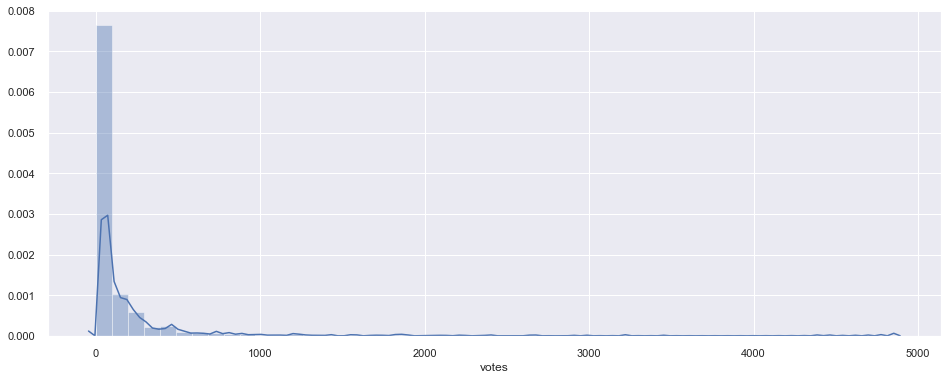

In [98]:
# Import library and dataset
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.distplot(df[d.value] )
#sns.plt.show()
 


### Scatter plot

In [99]:
d = widgets.Dropdown(options=['votes','Count_of_menu_items','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Count_of_dishes_liked','Number_of_restaurants/rest_type'], value='votes')
d

Dropdown(options=('votes', 'Count_of_menu_items', 'Number_of_restaurants/loc', 'Number_of_restaurants/cuisine'…

Text(0, 0.5, 'Ratings')

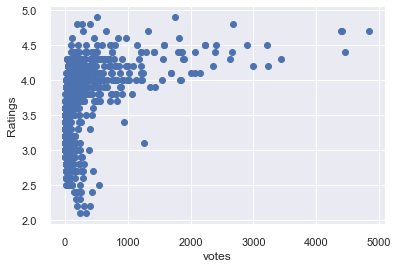

In [100]:
plt.scatter(df[d.value], df['rating'])
plt.xlabel(d.value)
plt.ylabel('Ratings')

In [101]:
df.head()

rating  votes                                         dish_liked  \
0     2.6    283  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...   
1     2.5    247  Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...   
2     4.0    533  Lassi, Butter Chicken, Sarson Ka Saag, Rajma C...   
3     3.0     38                                                NaN   
4     4.1    131              Naan, Roti, Shahi Paneer, Shahi Tukda   

   approx_cost(for two people)  \
0                        600.0   
1                        500.0   
2                        600.0   
3                        450.0   
4                        650.0   

                                        reviews_list menu_item  \
0  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   
1  [('Rated 5.0', "RATED\n  I have never written ...        []   
2  [('Rated 2.0', 'RATED\n  Had a lot of expectat...        []   
3  [('Rated 3.0', 'RATED\n  Ordered my Sunday Lun...        []   
4  [('Rated 4.0', "RATED\n  Went to this place on...        []   

                                                 UID  online-order  \
0  Nandhini Deluxe304, Opposite Apollo Public Sch...             0   
1  Dal Tadkaa1, Kathriguppe Main Road, 3rd Stage,...             1   
2  Bathinda Junction2331, 17th Cross, 24th Main, ...             1   
3  Punjab Di Shaan543, 7th Cross, 24th Main, Oppo...             1   
4  Dhaba Bytes78 Ground Floor, Right Wing, 14th C...             1   

   book-table      location      cuisines rest_type  Count_of_dishes_liked  \
0           0  Banashankari  North Indian    Dining                      5   
1           0  Banashankari  North Indian    Dining                      7   
2           1           HSR  North Indian    Dining                      7   
3           0           HSR  North Indian    Dining                      0   
4           0           HSR  North Indian    Dining                      4   

   Count_of_menu_items  Number_of_restaurants/loc  \
0                    1                         64   
1                    1                         64   
2                    1                        116   
3                    1                        116   
4                    1                        116   

   Number_of_restaurants/cuisine  Number_of_restaurants/rest_type  
0                            526                              356  
1                            526                              356  
2                            526                              356  
3                            526                              356  
4                            526                              356

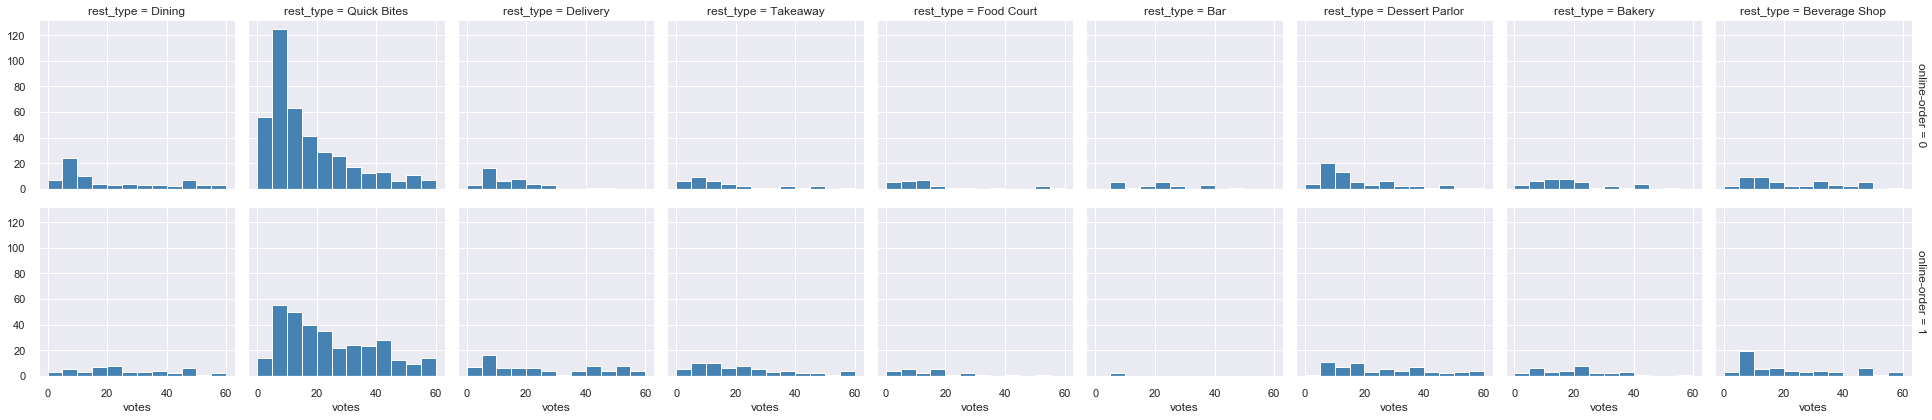

In [102]:
sns.set(style="darkgrid")
tips = df

g = sns.FacetGrid(df, row="online-order", col="rest_type", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "votes", color="steelblue", bins=bins)

In [103]:
d = widgets.Dropdown(options=['votes','Count_of_menu_items','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Count_of_dishes_liked','Number_of_restaurants/rest_type'], value='votes')
d

Dropdown(options=('votes', 'Count_of_menu_items', 'Number_of_restaurants/loc', 'Number_of_restaurants/cuisine'…

Text(0, 0.5, 'Ratings')

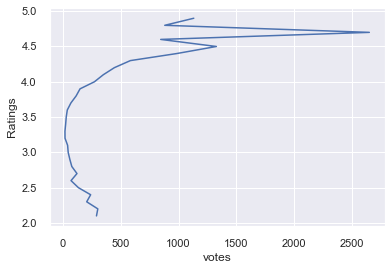

In [104]:
abc = df.groupby('rating',as_index=False).mean()
#abc.sample(5)
plt.plot(abc[d.value], abc['rating'])
#abc_xy = plt.hist(abc['votes'] )

plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel(d.value)
plt.ylabel('Ratings')

In [105]:
d = widgets.Dropdown(options=['votes','Count_of_menu_items','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Count_of_dishes_liked','Number_of_restaurants/rest_type'], value='votes')
d

Dropdown(options=('votes', 'Count_of_menu_items', 'Number_of_restaurants/loc', 'Number_of_restaurants/cuisine'…

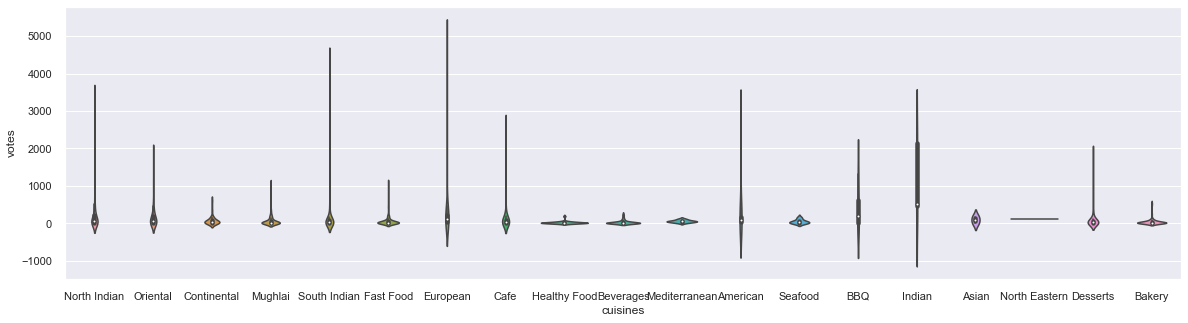

In [106]:
# plot
sns.violinplot(x='cuisines', y= d.value, data=df)

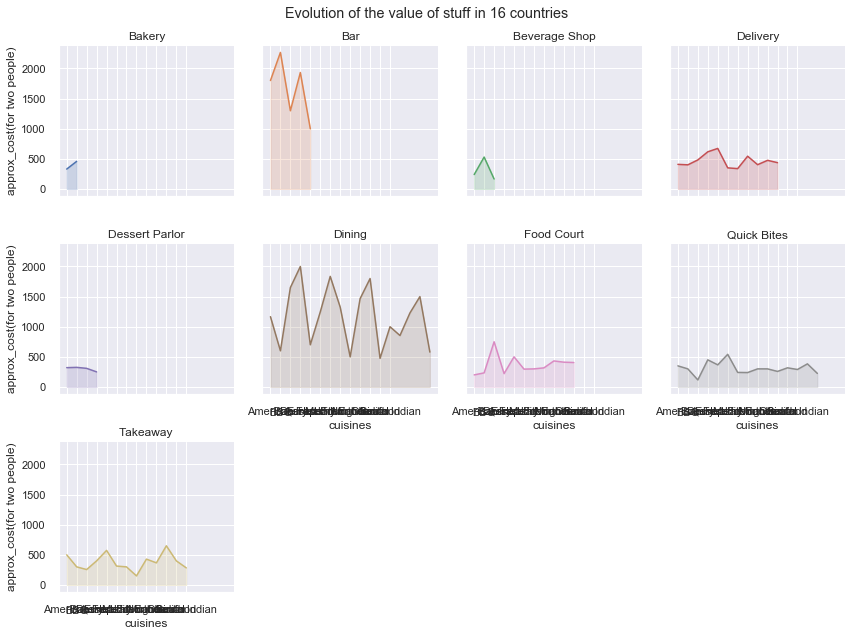

In [107]:
df1 = df.groupby(['rest_type','cuisines'], as_index=False).mean()
df1.head()

df1 = df.groupby(['rest_type','cuisines'], as_index=False).mean()
df1.head()

# Create a dataset
#my_count=["France","Australia","Japan","USA","Germany","Congo","China","England","Spain","Greece","Marocco","South Africa","Indonesia","Peru","Chili","Brazil"]
df2 = df1[[ 'rest_type','cuisines','approx_cost(for two people)']]

# Create a grid : initialize it
g = sns.FacetGrid(df2, col='rest_type', hue='rest_type', col_wrap=4, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'cuisines', 'approx_cost(for two people)')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'cuisines', 'approx_cost(for two people)', alpha=0.2).set_titles("{col_name} rest_type")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')

### Widget selection for box-plot

In [108]:
d = widgets.Dropdown(options=['rating', 'approx_cost(for two people)','Number_of_Restaurants/loc'], value='rating')
d

Dropdown(options=('rating', 'approx_cost(for two people)', 'Number_of_Restaurants/loc'), value='rating')

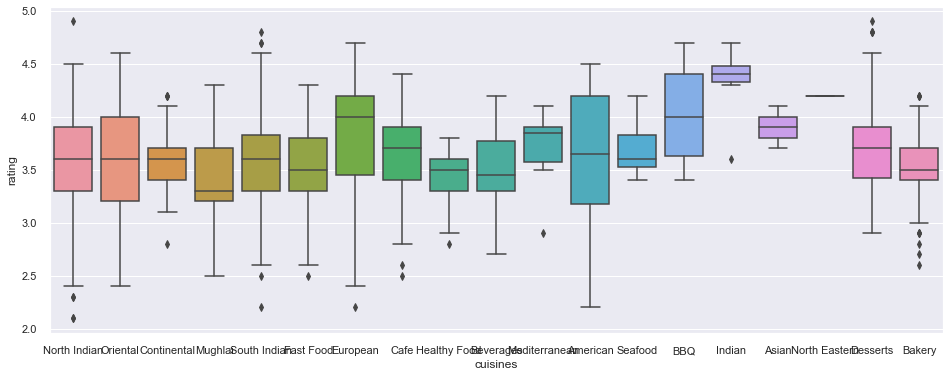

In [109]:
plt.figure(figsize=(16, 6))
sns.boxplot( y=df[d.value] , x = df["cuisines"])

# 5. Decision Tree
<a id="DT"></a>

In [110]:
features = ['votes','approx_cost(for two people)','book-table','online-order','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Number_of_restaurants/rest_type','Count_of_dishes_liked', 'Count_of_menu_items']
features

['votes',
 'approx_cost(for two people)',
 'book-table',
 'online-order',
 'Number_of_restaurants/loc',
 'Number_of_restaurants/cuisine',
 'Number_of_restaurants/rest_type',
 'Count_of_dishes_liked',
 'Count_of_menu_items']

In [2]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df.Good_or_Bad, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

In [ ]:
c = tree.DecisionTreeClassifier(max_depth = 2)
c.fit(X_train,y_train)
importance = c.fit(X_train,y_train).feature_importances_
print(dict(zip(features, importance)))

In [ ]:
accu_train = np.sum(c.predict(X_train) == y_train)/float(y_train.size)
accu_test = np.sum(c.predict(X_test) == y_test)/float(y_test.size)

print('Classification accuracy on train_set:{0}'.format(accu_train))
print('Classification accuracy on test_set:{0}'.format(accu_test))


In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(c, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clas = tree.DecisionTreeClassifier(max_depth=3)
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='Good_or_Bad',
               feature_names=features, 
               class_names=["1", "0"], 
               histtype= 'barstacked')  # barstackes is default
viz

# 6.Recommender System
<a id='RS'></a>

In [ ]:
features = ['votes','approx_cost(for two people)','book-table','online-order','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Number_of_restaurants/rest_type','Count_of_dishes_liked', 'Count_of_menu_items']
features

In [ ]:
df_rec = df
df2 = df
X_train, X_test, y_train, y_test = train_test_split(df_rec[features], df_rec.rating, test_size=0.00, random_state=42)


# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)



y_pred = pd.DataFrame(y_pred)
#y_pred = pd.DataFrame({'Column1':y_pred[0,:]})
#y_pred.describe()
# df_rec.rename(columns = ({y_pred[0]:'output_rf'},inplace=True)
# y_pred.head()
df_rec['ypred'] = y_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


#df_rec.join(y_pred)

df_rec_loc = []

df_rec_loc = df_rec.location == 'Banashankari'
# df_rec_rest = df_rec.rest_type == 'Dining'
# df_rec_cuisines = df_rec.cuisines == 'North Indian'
# df_rec_rat = df_rec.rating >= 4

df_rec2 = df_rec[df_rec_loc]
df_rec2.shape
# df_rec2 = df_rec[df_rec_rest]
# df_rec2 = df_rec[df_rec_cuisines]
# df_rec2 = df_rec[df_rec_rat]

#df_rec2.head()

In [ ]:
df_rec3 = df_rec2.sort_values(by=['ypred','rating'], ascending=False)

df_rec3.UID.head(5)
#df_rec3.head()

# 7.Simulator
<a id="SM"></a>

In [ ]:
df_rec.head()

In [ ]:
df_rec4 = df_rec
df_rec_loc2 = []
df_rec_cuisines2 = []
df_rec_rat2 = []

#df_rec_loc2 = df_rec4.location == 'Banashankari'
# df_rec_rest = df_rec.rest_type == 'Dining'
df_rec_cuisines2 = df_rec4.cuisines == 'North Indian'
df_rec_rat2 = df_rec4.rating >= 4

df_rec5 = df_rec4[df_rec_cuisines2]
df_rec5 = df_rec5[df_rec_rat2]
df_rec5.shape
# df_rec2 = df_rec[df_rec_rest]
# df_rec2 = df_rec[df_rec_cuisines]
# df_rec2 = df_rec[df_rec_rat]

#df_rec2.head()

In [ ]:
df_rec6 = df_rec5.groupby('cuisines',as_index=False).mean()
df_rec7 = df_rec
df_rec7['test'] = 1
df_rec7 = df_rec.groupby('test',as_index=False).mean()

#df_rec3.head()


In [ ]:
df_rec7

In [ ]:
df_rec6

In [ ]:
df_rec8 = df_rec6.append(df_rec7)

In [ ]:
df_rec8.drop_duplicates(inplace=True)

In [ ]:
df_rec8.reset_index(inplace=True)

In [ ]:
df_rec9 = df_rec8.T
df_rec9.drop('index',axis=0,inplace=True)

In [2]:
df_rec10 = df_rec9.T


In [ ]:
df_rec10 = df_rec10[['Count_of_dishes_liked','Count_of_menu_items','votes','approx_cost(for two people)']]

In [ ]:
df_rec11 = df_rec10.T

In [ ]:
df_rec11

In [ ]:
df_rec11.iloc[0,:].plot(kind = 'bar' , figsize = (6,4), color = ['teal','tomato'])
plt.ylabel('Count_of_dish_liked')

In [ ]:
df_rec11.iloc[1,:].plot(kind = 'bar' , figsize = (6,4), color = ['teal','tomato'] )
plt.ylabel('Count_of_menu_items')

In [ ]:
df_rec11.iloc[2,:].plot(kind = 'bar' , figsize = (6,4), color = ['teal','tomato'] )
plt.ylabel('votes')

In [ ]:
df_rec11.iloc[3,:].plot(kind = 'bar' , figsize = (6,4), color = ['teal','tomato'] )
plt.ylabel('approx_cost(for two people)')

# 8. Simple Linear Regression
<a id="SLR"></a>

#### Variable selection for Linear regression

In [ ]:
d = widgets.Dropdown(options=['votes', 'online-order', 'book-table','Count_of_menu_items','Number_of_Restaurants/loc','Number of restaurants/category','Count_of_dishes_liked'], value='votes')
d

In [ ]:
Y=df['rating'].values.reshape(-1,1)
X=df[d.value].values.reshape(-1,1)
lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)

plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel('ratings')
plt.ylabel(d.value)
plt.show()

r2_score(Y, Y_pred)

# 9. Word Cloud Analysis
<a id="WC"></a>

In [ ]:
d = widgets.Dropdown(options=['dish_liked', 'reviews_list','menu_item'], value='dish_liked')
d

In [ ]:
text = df[d.value]
import re
text = re.sub("[^a-zA-Z]",' ',str(text))
#text.replace("Rated", " ")
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

plt.figure( figsize=(10,5) )
plt.imshow(wordcloud)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Classification Algorithm Preprocessing

In [ ]:
df = pd.get_dummies(df, prefix=['Location_','cuisines_','rest_type_'], columns =['location','cuisines','rest_type'])

In [ ]:
df.columns

In [ ]:
X = ['votes', 'approx_cost(for two people)', 'online-order', 'book-table',
       'Count_of_dishes_liked', 'Count_of_menu_items',
       'Number_of_restaurants/loc', 'Number_of_restaurants/cuisine',
       'Number_of_restaurants/rest_type', 'Location__BTM',
       'Location__Banashankari', 'Location__Bannerghatta Road',
       'Location__Bellandur', 'Location__East', 'Location__Electronic City',
       'Location__HSR', 'Location__Indiranagar', 'Location__JP Nagar',
       'Location__Jayanagar', 'Location__Kalyan Nagar',
       'Location__Koramangala', 'Location__MG Road', 'Location__Marathahalli',
       'Location__New BEL Road', 'Location__North', 'Location__Sarjapur Road',
       'Location__South', 'Location__Whitefield', 'Location__west',
       'cuisines__American', 'cuisines__Asian', 'cuisines__BBQ',
       'cuisines__Bakery', 'cuisines__Beverages', 'cuisines__Cafe',
       'cuisines__Continental', 'cuisines__Desserts', 'cuisines__European',
       'cuisines__Fast Food', 'cuisines__Healthy Food', 'cuisines__Indian',
       'cuisines__Mediterranean', 'cuisines__Mughlai',
       'cuisines__North Eastern', 'cuisines__North Indian',
       'cuisines__Oriental', 'cuisines__Seafood', 'cuisines__South Indian',
       'rest_type__Bakery', 'rest_type__Bar', 'rest_type__Beverage Shop',
       'rest_type__Delivery', 'rest_type__Dessert Parlor', 'rest_type__Dining',
       'rest_type__Food Court', 'rest_type__Quick Bites',
       'rest_type__Takeaway']

In [ ]:
Y = ['Good_or_Bad']

In [ ]:
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(df[X], df[Y], test_size=test_size, random_state=seed)

# 10.Logistic regression
<a id='LR'></a>

In [ ]:
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
predictions = clf.predict(X_test)
#array([0, 0])
clf.predict_proba(X_test) 
#clf.score(predictions, y_test)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 11.Classification Algorithms
<a id='CLA'></a>
### Random Forest

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))


feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)
#feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)

#features = feature_imp.head(10)

plt.figure(figsize=(16, 6))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### XGboost

In [ ]:
#X = dataset[:,0:8]
#Y = dataset[:,8]
# split data into train and test sets

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 12.Ensemble Classifier
<a id='ECL'></a>

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors" : np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

In [ ]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

In [ ]:
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

In [ ]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

In [ ]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

# 13.K Means Clustering
<a id='KMA'><a>

In [ ]:
from pandas import DataFrame

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.vq import vq, kmeans, whiten

 

features_cluster = ['votes','rating','approx_cost(for two people)',

                                     'online-order','book-table','Count_of_dishes_liked',

                                    'Count_of_menu_items','Number_of_restaurants/loc',

                                    'Number_of_restaurants/cuisine',

                                    'Number_of_restaurants/rest_type']

 

kmeans = KMeans(n_clusters=3).fit(whiten(df[features_cluster]))

centroids = kmeans.cluster_centers_

print(centroids)

r = kmeans.predict(whiten(df[features_cluster]))

r = pd.DataFrame(r)

r.shape
 

df_clus = df

df_clus['clusters'] = r

df_clus1 = df_clus.groupby('clusters').mean()

In [ ]:
df_clus1 = df_clus1[['rating','votes','approx_cost(for two people)','Count_of_dishes_liked','Number_of_restaurants/rest_type']]

In [ ]:
df_clus2 = df_clus1.T

In [ ]:
df_clus2.iloc[0,0:3].plot(kind='bar',figsize = (6,4),color = ['royalblue','teal','tomato'])
plt.ylabel('rating')

In [ ]:
df_clus2.iloc[1,0:3].plot(kind='bar',figsize = (6,4),color = ['royalblue','teal','tomato'])
plt.ylabel('votes')

In [ ]:
df_clus2.iloc[2,0:3].plot(kind='bar',figsize = (6,4),color = ['royalblue','teal','tomato'])
plt.ylabel('approx_cost(for two people)')

In [ ]:
df_clus2.iloc[3,0:3].plot(kind='bar',figsize = (6,4),color = ['royalblue','teal','tomato'])
plt.ylabel('Count_of_dishes_liked')

In [ ]:
df_clus2.iloc[4,0:3].plot(kind='bar',figsize = (6,4),color = ['royalblue','teal','tomato'])
plt.ylabel('Number_of_restaurants/rest_type')

In [ ]:
df.head()


# 14.Regression Algorithms
<a id='RGA'></a>

In [ ]:
X = ['votes', 'approx_cost(for two people)', 'online-order', 'book-table',
       'Count_of_dishes_liked', 'Count_of_menu_items',
       'Number_of_restaurants/loc', 'Number_of_restaurants/cuisine',
       'Number_of_restaurants/rest_type', 'Location__BTM',
       'Location__Banashankari', 'Location__Bannerghatta Road',
       'Location__Bellandur', 'Location__East', 'Location__Electronic City',
       'Location__HSR', 'Location__Indiranagar', 'Location__JP Nagar',
       'Location__Jayanagar', 'Location__Kalyan Nagar',
       'Location__Koramangala', 'Location__MG Road', 'Location__Marathahalli',
       'Location__New BEL Road', 'Location__North', 'Location__Sarjapur Road',
       'Location__South', 'Location__Whitefield', 'Location__west',
       'cuisines__American', 'cuisines__Asian', 'cuisines__BBQ',
       'cuisines__Bakery', 'cuisines__Beverages', 'cuisines__Cafe',
       'cuisines__Continental', 'cuisines__Desserts', 'cuisines__European',
       'cuisines__Fast Food', 'cuisines__Healthy Food', 'cuisines__Indian',
       'cuisines__Mediterranean', 'cuisines__Mughlai',
       'cuisines__North Eastern', 'cuisines__North Indian',
       'cuisines__Oriental', 'cuisines__Seafood', 'cuisines__South Indian',
       'rest_type__Bakery', 'rest_type__Bar', 'rest_type__Beverage Shop',
       'rest_type__Delivery', 'rest_type__Dessert Parlor', 'rest_type__Dining',
       'rest_type__Food Court', 'rest_type__Quick Bites',
       'rest_type__Takeaway']

In [ ]:
y='rating'
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=test_size, random_state=seed)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred_train = regressor.predict(X_train)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Linear regression using multiple dependent variables

In [ ]:
feature_cols=['votes','Count_of_menu_items','Number_of_restaurants/loc','Number_of_restaurants/cuisine','Count_of_dishes_liked','Number_of_restaurants/rest_type']
X=df[feature_cols]
y=df.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
print('R-sq val',lr.score(X,y))
plt.scatter(y_test,predictions)
#plt.plot(X_train,predictions,color='green')
plt.xlabel('votes,online-order,book-table,Count_of_menu_items')
plt.ylabel('Ratings')
plt.show()

In [ ]:
df.columns

In [ ]:
df_sim = df[(df['cuisines__North Indian']==1)&(df['rating']>=4)]

In [ ]:
df_sim1 = df_sim.groupby('cuisines__North Indian').mean()

In [ ]:
df_sim2 = df[(df['cuisines__North Indian']==1)&(df['rating']<4)]

In [ ]:
df_sim2 = df_sim2.groupby('cuisines__North Indian').mean()

In [ ]:
df_sim1 = df_sim1.append(df_sim2)

# 15.Sentiment Analysis
<a id="SA"></a>

In [ ]:
!pip install stanfordnlp
!pip install textblob

In [ ]:
!pip install corpora

In [ ]:
text=pd.read_csv("Review_Final (1).csv")

text.head()
text.columns

text.info()


stopwords = set(STOPWORDS)
stopwords.update(["x83Ã","x82Ã","place","restuarant"])
text2=text[text.Rating>4.5]
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(' '.join(text2['Review']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis

import stanfordnlp

# stanfordnlp.download('en')

nlp = stanfordnlp.Pipeline()
doc = nlp("Barack Obama was born in Hawaii.  He was elected president in 2008.")
doc.sentences[0].print_dependencies()

import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

text['word_count'] = text['Review'].apply(lambda x: len(str(x).split(" ")))
text[['Review','word_count']].head()

def avg_word(sentence):
    words = sentence.split()
    if len(words)>0:
        return (sum(len(word) for word in words)/len(words))
    else:
        return (0)

text['avg_word'] = text['Review'].apply(lambda x: avg_word(x))
text[['Review','avg_word']].head()

from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

text['stopwords'] = text['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
text[['Review','stopwords']].head()

text['hastags'] = text['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
text[['Review','hastags']].head()

text['numerics'] = text['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text[['Review','numerics']].head()

text['upper'] = text['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
text[['Review','upper']].head()

text['tweet'] = text['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['Review'].head()

text['tweet'] = text['Review'].str.replace('[^\w\s]','')
text['Review'].head()

from nltk.corpus import stopwords
stop = stopwords.words('english')
text['Review'] = text['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text['Review'].head()

freq = pd.Series(' '.join(text['Review']).split()).value_counts()[:100]
freq

freq = list(freq.index)
text['Review'] = text['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['Review'].head()

freq = pd.Series(' '.join(text['Review']).split()).value_counts()[-100:]
freq



freq = list(freq.index)
text['Review'] = text['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['Review'].head()




from textblob import TextBlob
text['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

TextBlob(text['Review'][1]).words


from nltk.stem import PorterStemmer
st = PorterStemmer()
text['Review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

from textblob import Word
text['Review']= text['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text['Review'].head()

TextBlob(text['Review'][0]).ngrams(2)

tf1 = (text['Review'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1


for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(text.shape[0]/(len(text[text['Review'].str.contains(word)])))

tf1

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(text['Review'])

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(text['Review'])
train_bow

text['Review'][:5].apply(lambda x: TextBlob(x).sentiment)

text['sentiment'] = text['Review'].apply(lambda x: TextBlob(x).sentiment[0] )
text[['Review','sentiment']].head()

text.head()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt

## Score- Process of Vectorization - (% Of positive words)/ Total Number of words in a sentence

text.head()

text['RF'] = np.where(text['Rating']>3,1,0)

text.head()

text2=text[['tweet','RF']]

text2.shape

text2.head()




train_data=text2[:14000]
test_data=text2[14000:15813]

def training_step(data, vectorizer):
    training_text = [data[0] for data in data]
    training_result = [data[1] for data in data]

    training_text = vectorizer.fit_transform(training_text)

    return BernoulliNB().fit(training_text, training_result)



train_data=train_data.values




vectorizer = CountVectorizer(binary = 'true')
classifier = training_step(train_data, vectorizer)
result = classifier.predict(vectorizer.transform(["Unhealthy ,but good food"]))

result[0]

def analyse_text(classifier, vectorizer, text):
    return text, classifier.predict(vectorizer.transform([text]))
  
def print_result(result):
    text, analysis_result = result
    print_text = "Positive" if analysis_result[0] == '1' else "Negative"
    print(text, ":", print_text)









def simple_evaluation(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    evaluation_result   = [evaluation_data[1] for evaluation_data in evaluation_data]

    total = len(evaluation_text)
    corrects = 0
    for index in range(0, total):
        analysis_result = analyse_text(classifier, vectorizer, evaluation_text[index])
        text, result = analysis_result
        corrects += 1 if result[0] == evaluation_result[index] else 0

    return corrects * 100 / total

test_data=test_data.values


simple_evaluation(test_data)

def create_confusion_matrix(evaluation_data):
    evaluation_text     = [evaluation_data[0] for evaluation_data in evaluation_data]
    actual_result       = [evaluation_data[1] for evaluation_data in evaluation_data]
    prediction_result   = []
    for text in evaluation_text:
        analysis_result = analyse_text(classifier, vectorizer, text)
        prediction_result.append(analysis_result[1][0])
    
    matrix = confusion_matrix(actual_result, prediction_result)
    return (matrix)

create_confusion_matrix(test_data)

pd.DataFrame(
    create_confusion_matrix(test_data), 
    columns=["Negatives", "Positives"],
    index=["Negatives", "Positives"])



confusion_matrix_result=create_confusion_matrix(test_data)

classes = ["Negatives", "Positives"]

plt.figure()
plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Sentiment Analysis")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_result.max() / 2.
for row, column in itertools.product(range(confusion_matrix_result.shape[0]), range(confusion_matrix_result.shape[1])):
    plt.text(column, row, format(confusion_matrix_result[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_result[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

